In [24]:
#Importación de librerias necesarias
import pandas as pd
from sklearn.cluster import DBSCAN
import sklearn.cluster as cluster
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.metrics import silhouette_score
from itertools import product
import seaborn as sns

In [25]:
datos = pd.read_csv('dengue_limpio.csv')
datos.head(5)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_iq,city_sj
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,0,1
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,0,1
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,0,1
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,0,1
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,0,1


In [26]:
features = datos.columns
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos)
datos_escalados = pd.DataFrame(datos_escalados, columns = features) #La estandarización genera un array numpy, por lo que lo convierto de nuevo a dataframe con la conservación de la features.

In [27]:
datos_escalados.mean()

year                                    -4.980753e-16
weekofyear                              -1.544095e-18
ndvi_ne                                 -3.797329e-16
ndvi_nw                                  1.138436e-16
ndvi_se                                  2.944836e-16
ndvi_sw                                 -2.822834e-16
precipitation_amt_mm                    -7.337308e-16
reanalysis_air_temp_k                    1.908360e-14
reanalysis_avg_temp_k                   -1.119335e-14
reanalysis_dew_point_temp_k              1.666985e-14
reanalysis_max_air_temp_k               -7.830427e-15
reanalysis_min_air_temp_k                9.426220e-16
reanalysis_precip_amt_kg_per_m2          5.217514e-17
reanalysis_relative_humidity_percent     9.478834e-16
reanalysis_sat_precip_amt_mm            -7.337308e-16
reanalysis_specific_humidity_g_per_kg    3.182360e-16
reanalysis_tdtr_k                        2.635255e-16
station_avg_temp_c                      -1.384157e-16
station_diur_temp_rng_c     

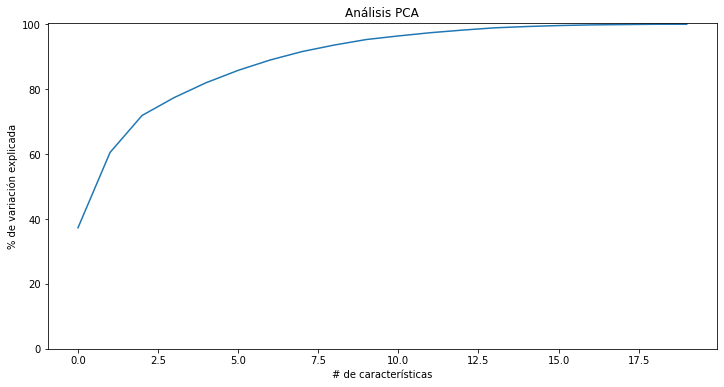

In [28]:
#Aplico PCA para 20 componentes para evaluar la varianza explicada por cada uno
pca = PCA(n_components=20)
pca.fit(datos_escalados)
variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% de variación explicada')
plt.xlabel('# de características')
plt.title('Análisis PCA')
plt.ylim(0,100.5)
plt.plot(var)

In [29]:
#Aplicamos PCA de 2 componentes
pca = PCA(n_components=2)
pca.fit(datos_escalados)
pca_scale = pca.transform(datos_escalados)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2'])
print(pca.explained_variance_ratio_)

[0.37327109 0.23167433]


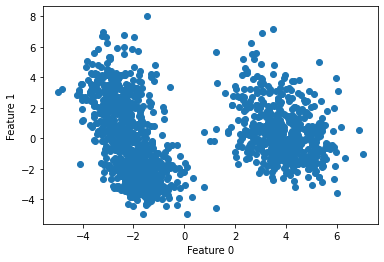

In [30]:
#Visualizamos los datos
plt.scatter(pca_scale[:, 0], pca_scale[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

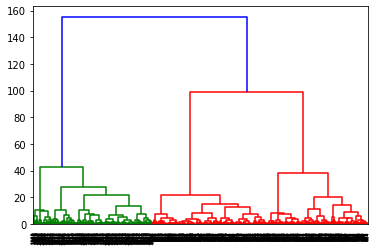

In [31]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
clustering = sch.linkage(pca_df, method='ward')
dendrogram = sch.dendrogram(clustering)

In [32]:
clusters = sch.fcluster(clustering, t=100, criterion='distance')

In [33]:
set(clusters)

{1, 2}

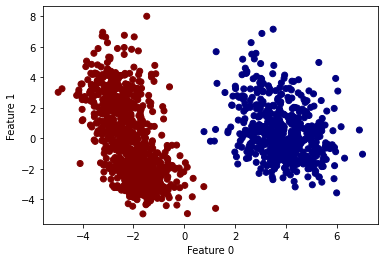

In [34]:
# Representación de los clusters
plt.scatter(pca_scale[:, 0], pca_scale[:, 1],c=clusters, cmap='jet')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()